<a href="https://colab.research.google.com/github/LingPeiYu/AaltoThesisDataAnalysis/blob/main/AaltoThesisDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Analysis

In [192]:
#Polynomial Regression Analysis
%config Completer.use_jedi = False # enable code auto-completion
import numpy as np #import numpy to work with arrays
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.preprocessing import PolynomialFeatures,normalize,MinMaxScaler # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression,LogisticRegression,HuberRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score # function to calculate mean squared error
from sklearn.model_selection import train_test_split

In [193]:
data1=pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False)
data2=pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False)

TestData=pd.concat([data1,data2],axis=0)

# print the first 5 rows of the DataFrame 'RawData'
print(type(TestData))
#print how many rows in the 'RawData'
print(len(TestData))

print(TestData)

<class 'pandas.core.frame.DataFrame'>
40
    TestIndex  LevelIndex  Width  Length  ChessGroup  DataPieceCount  \
0           0           2     10      10       10023              10   
1           1          14     10      10        1102              10   
2           2           9     10      10          12              10   
3           3          16     10      10        2004              10   
4           4          18     10      10        2004              10   
5           5           6     10      10         404              10   
6           6          17     10      10        2004              10   
7           7           7     10      10         404              10   
8           8          12     10      10        1102              10   
9           9           5     10      10         404              10   
10         10           4     10      10         404              10   
11         11          15     10      10        1102              10   
12         12          

<ipython-input-193-665dd17186c4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1=pd.read_csv("2023-3-31-18-54-29.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False)
<ipython-input-193-665dd17186c4>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2=pd.read_csv("2023-4-1-13-06-22.csv", engine="python",encoding="ISO-8859-1", error_bad_lines=False)


In [194]:
TestData.columns

Index(['TestIndex', 'LevelIndex', 'Width', 'Length', 'ChessGroup',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'GenerationTime', 'FailureCount', 'SuccessStep', 'PercivedDifficulty'],
      dtype='object')

In [195]:
TestData=TestData.assign(KingCount=TestData['ChessGroup']//100000)
TestData=TestData.assign(QueenCount=TestData['ChessGroup']%100000//10000)
TestData=TestData.assign(RookCount=TestData['ChessGroup']%10000//1000)
TestData=TestData.assign(BishopCount=TestData['ChessGroup']%1000//100)
TestData=TestData.assign(KnightCount=TestData['ChessGroup']%100//10)
TestData=TestData.assign(PawnCount=TestData['ChessGroup']%10//1)

print(type(TestData))

<class 'pandas.core.frame.DataFrame'>


In [196]:
TestData.columns

Index(['TestIndex', 'LevelIndex', 'Width', 'Length', 'ChessGroup',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'GenerationTime', 'FailureCount', 'SuccessStep', 'PercivedDifficulty',
       'KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount',
       'PawnCount'],
      dtype='object')

In [197]:
TestData=TestData[['TestIndex', 'LevelIndex', 'Width', 'Length', 
       'KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount',
       'DataPieceCount', 'TargetStep', 'StepRange(+-)', 'AIBestStep',
       'FailureCount', 'SuccessStep', 'PercivedDifficulty']]
print(TestData)

    TestIndex  LevelIndex  Width  Length  KingCount  QueenCount  RookCount  \
0           0           2     10      10          0           1          0   
1           1          14     10      10          0           0          1   
2           2           9     10      10          0           0          0   
3           3          16     10      10          0           0          2   
4           4          18     10      10          0           0          2   
5           5           6     10      10          0           0          0   
6           6          17     10      10          0           0          2   
7           7           7     10      10          0           0          0   
8           8          12     10      10          0           0          1   
9           9           5     10      10          0           0          0   
10         10           4     10      10          0           0          0   
11         11          15     10      10          0           0 

In [198]:
scaler = MinMaxScaler()

#X=TestData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']]
#X['AIBestStep']=scaler.fit_transform(X[['AIBestStep']])
#X=X.to_numpy()
#y=TestData[['PercivedDifficulty']]
#y['PercivedDifficulty']=scaler.fit_transform(y[['PercivedDifficulty']])
#y=y.to_numpy()

#print(X)
#print(y)

#X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.5,random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.2,random_state=42)

lvIndexs=TestData[['LevelIndex']]
lvIndexs=np.unique(lvIndexs.to_numpy())

lv_train, lv_rem, lv_train, lv_rem = train_test_split(lvIndexs,lvIndexs,test_size=0.5,random_state=42)
lv_val, lv_test, lv_val, lv_test = train_test_split(lv_rem,lv_rem,test_size=0.2,random_state=42)

#process TestData
TestData['AIBestStep']=scaler.fit_transform(TestData[['AIBestStep']])
TestData['FailureCount']=scaler.fit_transform(TestData[['FailureCount']])
TestData['PercivedDifficulty']=scaler.fit_transform(TestData[['PercivedDifficulty']])

data_train=TestData[TestData['LevelIndex'].isin(lv_train.ravel())]
data_val=TestData[TestData['LevelIndex'].isin(lv_val.ravel())]
data_test=TestData[TestData['LevelIndex'].isin(lv_test.ravel())]

print(TestData)

#Get X
X_train=data_train[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
X_val=data_val[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
X_test=data_test[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()

#Get Y
y_train=data_train[['PercivedDifficulty']].to_numpy()
y_val=data_val[['PercivedDifficulty']].to_numpy()
y_test=data_test[['PercivedDifficulty']].to_numpy()


    TestIndex  LevelIndex  Width  Length  KingCount  QueenCount  RookCount  \
0           0           2     10      10          0           1          0   
1           1          14     10      10          0           0          1   
2           2           9     10      10          0           0          0   
3           3          16     10      10          0           0          2   
4           4          18     10      10          0           0          2   
5           5           6     10      10          0           0          0   
6           6          17     10      10          0           0          2   
7           7           7     10      10          0           0          0   
8           8          12     10      10          0           0          1   
9           9           5     10      10          0           0          0   
10         10           4     10      10          0           0          0   
11         11          15     10      10          0           0 

<ipython-input-198-c0d63c3e6764>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData['AIBestStep']=scaler.fit_transform(TestData[['AIBestStep']])
<ipython-input-198-c0d63c3e6764>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData['FailureCount']=scaler.fit_transform(TestData[['FailureCount']])
<ipython-input-198-c0d63c3e6764>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [199]:
tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

[0.01878295110056676, 0.018079915947749443, 0.018055555555555554, 0.018055555555555554, 0.01805555555555555, 0.01805555555555554, 0.01805555555555556, 0.018055555555555526, 0.018055555555555554]
[0.06294071944320921, 0.2287873765516616, 0.3430490178100323, 0.46619777117078687, 0.8553432633439633, 2.1088621947415715, 6.4138816795663205, 21.950310095806476, 79.86188643496212]


<Figure size 800x2000 with 0 Axes>

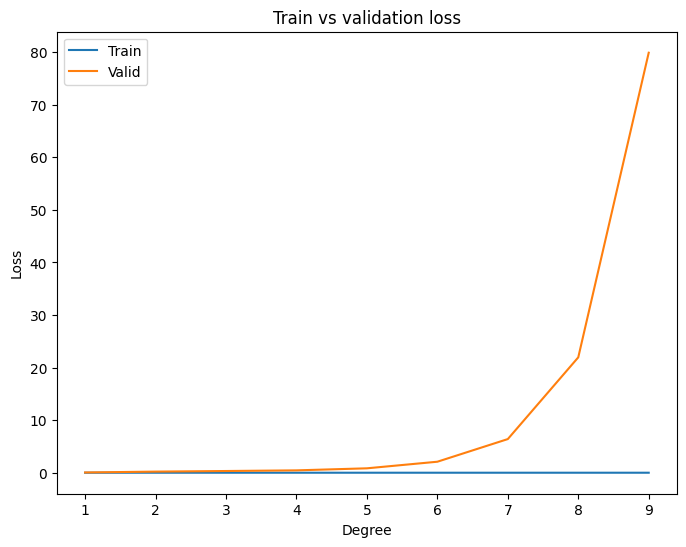

In [200]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,10), tr_errors, label = 'Train')
plt.plot(range(1,10), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [201]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regrPreDiff=LinearRegression(fit_intercept=False)
regrPreDiff.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regrPreDiff.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.020158565005368168


[0.0126136626101308, 0.009988578862257555, 0.00997164461247637, 0.00997164461247637, 0.009971644612476373, 0.009971644612476366, 0.00997164461247638, 0.00997164461247638, 0.009971644612476353]
[0.07370547277518387, 0.15148788553120346, 0.13055354557350773, 0.1985567555243412, 0.4409464703420739, 1.3256991064732286, 4.662582980693552, 17.52277323925134, 67.73675723701835]


<Figure size 800x2000 with 0 Axes>

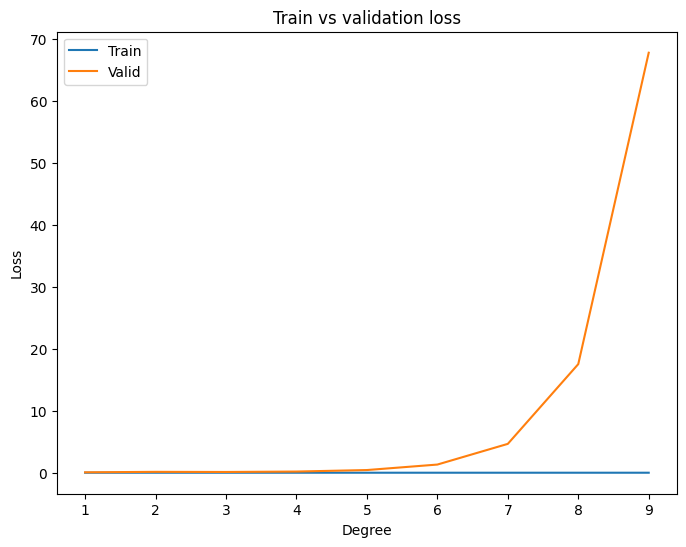

In [202]:
#Get Y
y_train=data_train[['FailureCount']].to_numpy()
y_val=data_val[['FailureCount']].to_numpy()
y_test=data_test[['FailureCount']].to_numpy()

tr_errors = []
val_errors = []
#Polynomial Regression
plt.figure(figsize=(8, 20))
for degree in range(1,10):
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  regr=LinearRegression(fit_intercept=False)
  regr.fit(X_train_poly,y_train)
  y_pred_train = regr.predict(X_train_poly)
  tr_error = mean_squared_error(y_train, y_pred_train)
  X_val_poly = poly.fit_transform(X_val)
  y_pred_val = regr.predict(X_val_poly)
  val_error = mean_squared_error(y_val, y_pred_val)
  tr_errors.append(tr_error)
  val_errors.append(val_error)

print(tr_errors)
print(val_errors)

plt.figure(figsize=(8, 6))
plt.plot(range(1,10), tr_errors, label = 'Train')
plt.plot(range(1,10), val_errors,label = 'Valid')
plt.legend(loc = 'upper left')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [203]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
regrFail=LinearRegression(fit_intercept=False)
regrFail.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)
y_pred_test = regrFail.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_pred_test)
print(test_error)

0.006618119952447571


# Correlation Analysis

In [204]:
#Corr Analysis
import seaborn as sns

In [205]:
#sort each test's values by level index
data1=data1.sort_values(by='LevelIndex',ascending=True)
data2=data2.sort_values(by='LevelIndex',ascending=True)

    AIBestStep  Player1SuccessStep  Player2SuccessStep
0     0.000000            0.064516            0.000000
1     0.259259            0.225806            0.977778
2     0.777778            0.451613            0.755556
3     1.000000            0.645161            0.355556
4     0.111111            0.000000            0.133333
5     0.444444            0.774194            1.000000
6     0.629630            0.741935            0.422222
7     0.962963            1.000000            0.577778
8     0.148148            0.193548            0.044444
9     0.518519            0.354839            0.577778
10    0.666667            0.451613            0.444444
11    0.962963            0.483871            0.288889
12    0.148148            0.064516            0.288889
13    0.407407            0.290323            0.133333
14    0.666667            0.451613            0.622222
15    0.962963            0.580645            0.444444
16    0.111111            0.193548            0.222222
17    0.44

<Axes: >

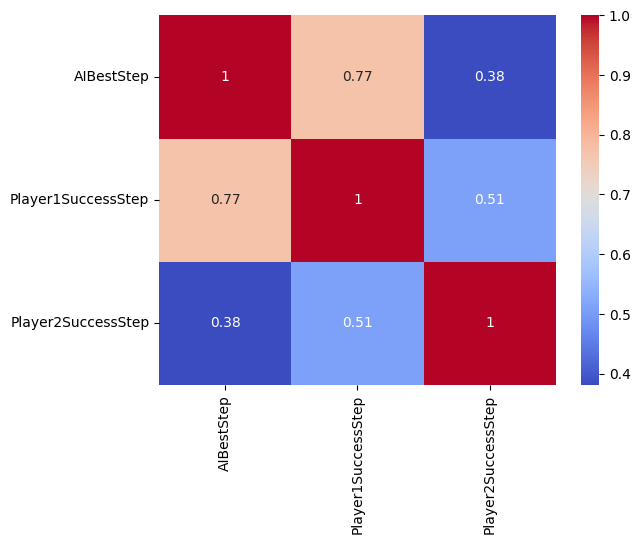

In [210]:
SubTestData=pd.merge(data1.rename(columns={'SuccessStep': 'Player1SuccessStep'})[['LevelIndex','AIBestStep','Player1SuccessStep']],
                    data2.rename(columns={'SuccessStep': 'Player2SuccessStep'})[['LevelIndex','Player2SuccessStep']],
                   on='LevelIndex',how='outer')[['AIBestStep','Player1SuccessStep','Player2SuccessStep']]

for i in range(0,SubTestData.shape[1]):
  SubTestData.iloc[:, i]=scaler.fit_transform(SubTestData.iloc[:, [i]])

print(SubTestData)

corr_matrix = SubTestData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    AIBestStep  Player1PercivedDifficulty  Player2PercivedDifficulty
0           15                          3                          2
1           22                          4                          3
2           36                          7                          6
3           42                          7                          5
4           18                          2                          4
5           27                          7                          6
6           32                          6                          3
7           41                          7                          5
8           19                          1                          1
9           29                          1                          2
10          33                          1                          2
11          41                          2                          2
12          19                          1                          2
13          26                    

<Axes: >

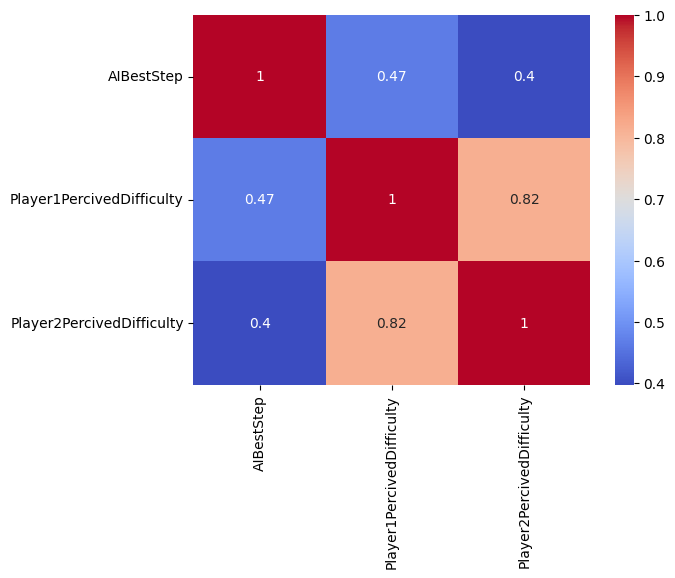

In [211]:
SubTestData=pd.merge(data1.rename(columns={'PercivedDifficulty': 'Player1PercivedDifficulty'})[['LevelIndex','AIBestStep','Player1PercivedDifficulty']],
                    data2.rename(columns={'PercivedDifficulty': 'Player2PercivedDifficulty'})[['LevelIndex','Player2PercivedDifficulty']],
                   on='LevelIndex',how='outer')[['AIBestStep','Player1PercivedDifficulty','Player2PercivedDifficulty']]

print(SubTestData)

for i in range(0,SubTestData.shape[1]):
  SubTestData.iloc[:, i]=scaler.fit_transform(SubTestData.iloc[:, [i]])

print(SubTestData)

corr_matrix = SubTestData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    AIBestStep  Player1FailureCount  Player2FailureCount
0           15                    9                    0
1           22                   11                    1
2           36                   10                    3
3           42                   25                    8
4           18                    0                    2
5           27                   46                   14
6           32                   10                    1
7           41                   30                    4
8           19                    3                    0
9           29                    0                    0
10          33                    0                    0
11          41                    0                    0
12          19                    3                    0
13          26                    0                    0
14          33                    1                    1
15          41                    7                    3
16          18                 

<Axes: >

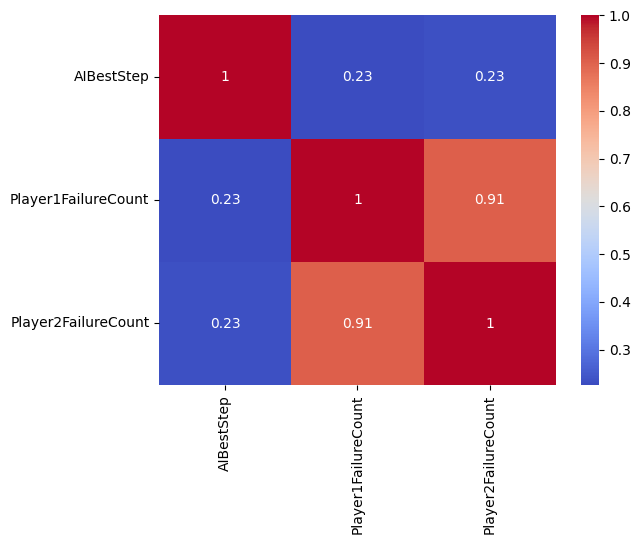

In [212]:
SubTestData=pd.merge(data1.rename(columns={'FailureCount': 'Player1FailureCount'})[['LevelIndex','AIBestStep','Player1FailureCount']],
                    data2.rename(columns={'FailureCount': 'Player2FailureCount'})[['LevelIndex','Player2FailureCount']],
                   on='LevelIndex',how='outer')[['AIBestStep','Player1FailureCount','Player2FailureCount']]

print(SubTestData)

for i in range(0,SubTestData.shape[1]):
  SubTestData.iloc[:, i]=scaler.fit_transform(SubTestData.iloc[:, [i]])

print(SubTestData)

corr_matrix = SubTestData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

    PredictedDifficulty  LevelIndex
0              0.496293           0
1              0.636418           1
2              0.916667           2
3              1.036773           3
4              0.336447           4
5              0.516607           5
6              0.616696           6
7              0.796856           7
8             -0.156880           8
9              0.043298           9
10             0.123369          10
11             0.283511          11
12             0.054320          12
13             0.194444          13
14             0.334569          14
15             0.494711          15
16            -0.043743          16
17             0.136418          17
18             0.236507          18
19             0.416667          19
    PredictedDifficulty  Player1PercivedDifficulty  Player2PercivedDifficulty
0              0.496293                   0.333333                        0.2
1              0.636418                   0.500000                        0.4
2         

<Axes: >

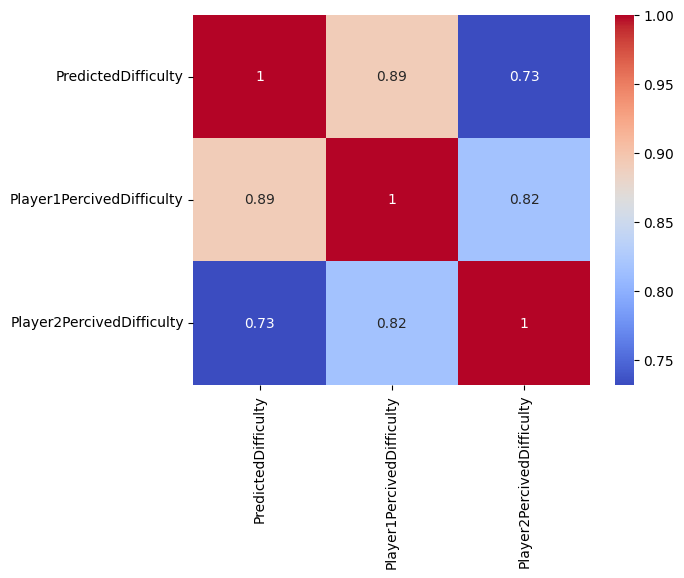

In [244]:
SubTestData=pd.merge(data1.rename(columns={'PercivedDifficulty': 'Player1PercivedDifficulty'})[['LevelIndex','Player1PercivedDifficulty']],
                    data2.rename(columns={'PercivedDifficulty': 'Player2PercivedDifficulty'})[['LevelIndex','Player2PercivedDifficulty']],
                   on='LevelIndex',how='outer')[['LevelIndex','Player1PercivedDifficulty','Player2PercivedDifficulty']]

for i in range(1,SubTestData.shape[1]):
  SubTestData.iloc[:, i]=scaler.fit_transform(SubTestData.iloc[:, [i]])

#sort level data
LevelData=TestData.drop_duplicates(subset='LevelIndex').sort_values(by='LevelIndex',ascending=True)
#print(LevelData)

X=LevelData[['AIBestStep','KingCount', 'QueenCount', 'RookCount', 'BishopCount', 'KnightCount', 'PawnCount']].to_numpy()
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)
y_pred = regrPreDiff.predict(X_poly)

y_pred=pd.DataFrame(y_pred,columns=['PredictedDifficulty'])
y_pred['LevelIndex']=range(0,LevelData.shape[0])
print(y_pred)

CorData=pd.merge(SubTestData,y_pred,on='LevelIndex',how='outer')[['PredictedDifficulty','Player1PercivedDifficulty','Player2PercivedDifficulty']]

print(CorData)

corr_matrix = CorData.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)